# 0. Computer vision libr in pytorch

* torchvision = base domain libr for pytorch
* torchvision.datasets = get datasets and data loading func for comt vision
* torchvission.models = get pretrained comp vision models
* torchvision.transforms = func for manipulation your vision data to be sutaible for use with an ML model
* torch.utils.data.Dataset = base dataset class for torch
* torch.data.DataLoader = cteates a python iterable over a dataset


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.8.0
0.23.0


# 1. Getting a dataset

In [2]:
#Setup training data
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
image, label = train_data[0]

In [5]:
class_names = train_data.classes
NUM_CLASSES = len(class_names)
NUM_CLASSES

10

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Image shape : torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

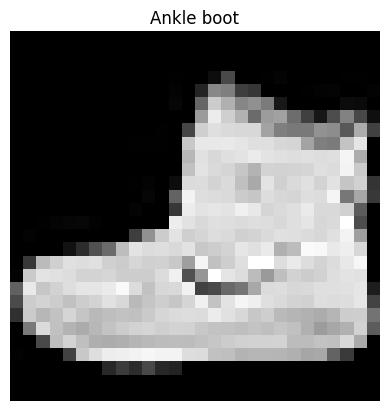

In [7]:
#1.2 Visualizing our data
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[9])
plt.axis(False)

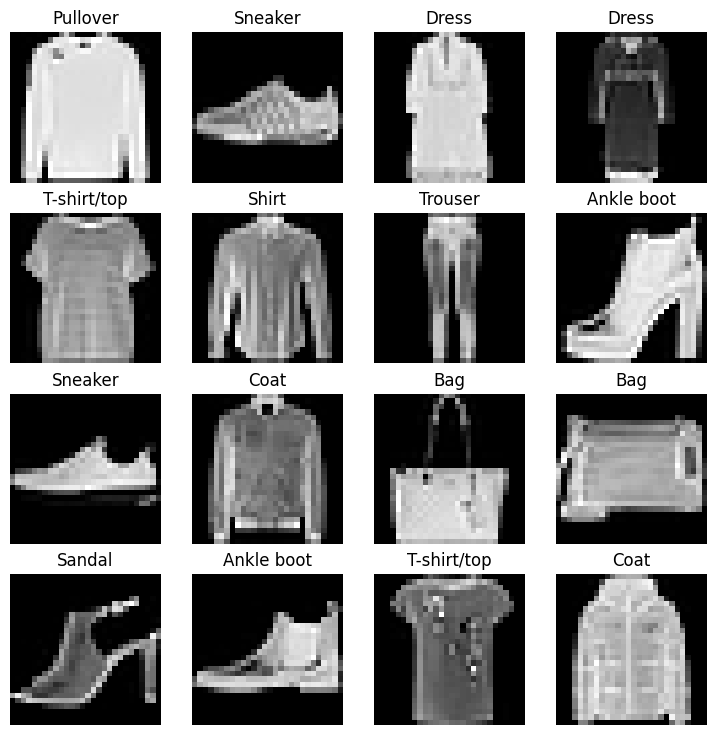

In [8]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

# 2. Preparing DataLoader

DataLoader turns our dataset into a Python iterable.

Moore specifically, we want to turn our data into batches

In [9]:
#Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [10]:
#Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Label: 5, label size: torch.Size([])


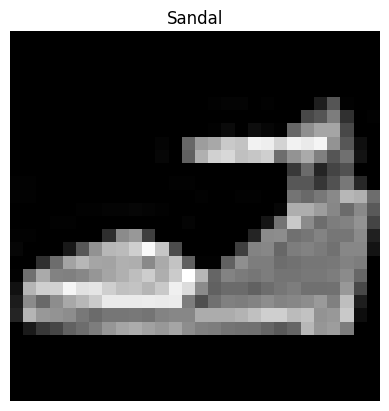

In [11]:
torch.manual_seed(42)
random_idx  = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Label: {label}, label size: {label.shape}")


#3. Model building:  baseline model

In [12]:
#Create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]
x.shape

#Flatten the sample
output = flatten_model(x) #perform forward pass
print (f"Shape before flattening: {x.squeeze().shape}")
print(f"Shape after: {output.squeeze().shape}")


Shape before flattening: torch.Size([28, 28])
Shape after: torch.Size([784])


In [13]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self,x ):
        return self.layer_stack(x)


In [14]:
torch.manual_seed(42)
INPUT_SHAPE = 784
HIDDEN_UNITS = 16
OUTPUT_SHAPE = len(class_names)
#Setup model input params
model_0 = FashionMNISTModelV0(
    input_shape=INPUT_SHAPE,
    output_shape=OUTPUT_SHAPE,
    hidden_units=HIDDEN_UNITS
)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [15]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0313, -0.0194, -0.0231,  ...,  0.0165,  0.0038,  0.0114],
                      [-0.0301, -0.0315, -0.0168,  ...,  0.0032,  0.0287, -0.0005],
                      [-0.0150, -0.0167, -0.0028,  ...,  0.0172,  0.0117, -0.0291]])),
             ('layer_stack.1.bias',
              tensor([ 0.0214,  0.0289,  0.0107,  0.0284, -0.0170, -0.0234, -0.0287, -0.0056,
                      -0.0035, -0.0203, -0.0122, -0.0115,  0.0344, -0.0026,  0.0290,  0.0034])),
             ('layer_stack.2.weight',
              tensor([[ 0.0891,  0.1441, -0.2301, -0.1127, -0.1900,  0.2429,  0.0917, -0.1048,
                       -0.1885,  0.1384,  0.0580, -0.1230, -0.1814, 

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [17]:
!pip install torchmetrics

In [18]:
from torchmetrics import Accuracy, F1Score, Recall, Precision, ConfusionMatrix
import requests
from pathlib import Path
#Dowload helper func from Learn PyTorch repo (if it is not already dowloaded)
if Path("helper_functions.py").is_file():
    print("exists")
else:
    print("dowloading")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)

exists


In [19]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device = None):
    "Prints difference betweeen start and end:"
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [20]:
start_time = timer()
# some code ...

end_time = timer()
print_train_time(start=start_time, end=end_time)

Train time on None: 0.000 seconds


9.749997843755409e-06

In [21]:
#import tqdm for progress bar
from tqdm.auto import tqdm

/Users/alt/Library/CloudStorage/OneDrive-Personal/Portfolio/skill-builder-process/ml_basics/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
#Creating a traing loop and training on batches

epochs = 3
# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Creating training and test loop
for epoch in tqdm(range(epochs)):
    model_0.train()
    print(f"Epoch: {epoch+1}\n-------")
    #Training
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        model_0.train()
        #1. Forward pass
        y_pred = model_0(X)

        #2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # accumulate train loss
        #3 three steps
        optimizer.zero_grad(); loss.backward(); optimizer.step()

        #print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

    #Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Testing
    test_loss, test_acc = 0, 0
    accuracy.reset()
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. Forward pass
            test_pred = model_0(X_test)

            #2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test).item()

            #3. accuracy

            accuracy.update(test_pred, y_test)
        test_loss /= len(test_dataloader)
        test_acc = accuracy.compute().item()
    print(f"Epoch {epoch+1}: Train loss = {train_loss:.4f} | Test loss = {test_loss:.4f} | Test acc = {test_acc:.4f}")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 33%|███▎      | 1/3 [00:01<00:03,  1.75s/it]

Epoch 1: Train loss = 0.5872 | Test loss = 0.4932 | Test acc = 0.8272
Epoch: 2
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 67%|██████▋   | 2/3 [00:03<00:01,  1.81s/it]

Epoch 2: Train loss = 0.4515 | Test loss = 0.4693 | Test acc = 0.8334
Epoch: 3
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


100%|██████████| 3/3 [00:05<00:00,  1.81s/it]

Epoch 3: Train loss = 0.4309 | Test loss = 0.4602 | Test acc = 0.8380
Train time on cpu: 5.453 seconds


In [23]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device,
               task: str = "multiclass",
               num_classes: int | None = None
) -> dict:
    """Returns a dict containing the result of the model pred on data_loader"""
    acc_metric = Accuracy(task=task, num_classes=num_classes).to(device)

    total_loss = 0.0
    total_n = 0

    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)

            # Make predictions
            logits = model(X)
            batch_loss = loss_fn(logits, y)

            n = y.size(0)
            total_loss += batch_loss.item() * n
            total_n += n

            acc_metric.update(logits, y)
        # Scale loss and acc to find the average loss/acc per batch
    avg_loss = total_loss / total_n
    avg_acc = acc_metric.compute().item()

    return {"model_name": model.__class__.__name__,
            "model_loss": avg_loss,
            "model_acc": avg_acc,
            "n_samples": total_n}
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    device=device,
    num_classes=NUM_CLASSES

)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 1338.94it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46046116366386414,
 'model_acc': 0.8379999995231628,
 'n_samples': 10000}

In [24]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_features, hidden, output):
        super().__init__()
        self.stack_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=output)
        )
    def forward(self, x):
        return self.stack_layer(x)




In [25]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_features=INPUT_SHAPE,
                              hidden=HIDDEN_UNITS,
                              output=OUTPUT_SHAPE).to(device)



In [26]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

In [27]:
#accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES)

In [37]:
#Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [29]:
#Training func
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device,
               task="multiclass",
               num_classes=None) -> tuple:
    """Performs a training with model trying to learn on data_loader"""
    #Creating training and test loop
    model.train()
    acc_metric = Accuracy(task=task, num_classes=num_classes).to(device)
    total_loss, total_n  = 0, 0
    for X, y in tqdm(data_loader):
        X, y = X.to(device), y.to(device)
        #1. Forward pass
        logits = model(X)

        #2. Calculate loss (per batch)
        batch_loss = loss_fn(logits, y)

        #Calc total loss and n(number of sample(batch))
        n = y.size(0)
        total_loss += batch_loss.item() * n # accumulate train loss
        total_n += n

        #acc
        acc_metric.update(logits, y)

        #3 three steps
        optimizer.zero_grad(set_to_none=True); batch_loss.backward(); optimizer.step()



    # Scale loss and acc to find the average loss/acc per batch
    avg_loss = total_loss / total_n
    avg_acc = acc_metric.compute().item()
    print(f"Train loss: {avg_loss:.5f} | Train accuracy: {avg_acc * 100:.2f}%")
    return avg_loss, avg_acc



In [30]:
#Testing func
def test_step(model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              device: torch.device = 'cpu',
              task="multiclass",
              num_classes=None) -> tuple:
    """Returns a tuple that contains avg_loss, avg_acc"""
    acc_metric = Accuracy(task=task, num_classes=num_classes).to(device)

    total_loss = 0.0
    total_n = 0

    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)

            # Make predictions
            logits = model(X)
            batch_loss = loss_fn(logits, y)

            n = y.size(0)
            total_loss += batch_loss.item() * n
            total_n += n

            acc_metric.update(logits, y)
    # Scale loss and acc to find the average loss/acc per batch
    avg_loss = total_loss / total_n
    avg_acc = acc_metric.compute().item()
    print(f"Test loss: {avg_loss:.5f} | Test accuracy: {avg_acc * 100:.2f}%")
    return avg_loss, avg_acc

In [31]:
import pandas as pd

In [57]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_features=INPUT_SHAPE,
                              hidden=HIDDEN_UNITS,
                              output=OUTPUT_SHAPE).to(device)


In [58]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001, weight_decay=0.0001)

In [59]:
train_history = []
epochs = 20
train_time_start = timer()
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device,
               data_loader=train_dataloader,
               num_classes=NUM_CLASSES)
    train_history.append({
        "epoch": epoch + 1,
        "train_avg_loss": train_loss,
        "train_avg_acc":  train_acc
    })
train_time_end = timer()

test_loss, test_acc = test_step(model=model_1,
            loss_fn=loss_fn,
            device=device,
            data_loader=test_dataloader,
            num_classes=NUM_CLASSES)


train_df = pd.DataFrame(train_history)
test_history = pd.DataFrame([{"test_avg_loss": test_loss,
                             "test_avg_acc":  test_acc,}])

print_train_time(train_time_start, train_time_end, device=str(next(model_1.parameters()).device))

  5%|▌         | 1/20 [00:01<00:35,  1.86s/it]

Train loss: 0.67058 | Train accuracy: 76.54%


 10%|█         | 2/20 [00:03<00:31,  1.74s/it]

Train loss: 0.45909 | Train accuracy: 83.88%


 15%|█▌        | 3/20 [00:05<00:29,  1.72s/it]

Train loss: 0.42807 | Train accuracy: 84.90%


 20%|██        | 4/20 [00:06<00:27,  1.72s/it]

Train loss: 0.40912 | Train accuracy: 85.50%


 25%|██▌       | 5/20 [00:08<00:25,  1.71s/it]

Train loss: 0.39730 | Train accuracy: 85.91%


 30%|███       | 6/20 [00:10<00:24,  1.74s/it]

Train loss: 0.38797 | Train accuracy: 86.19%


 35%|███▌      | 7/20 [00:12<00:22,  1.71s/it]

Train loss: 0.37984 | Train accuracy: 86.39%


 40%|████      | 8/20 [00:13<00:20,  1.69s/it]

Train loss: 0.37256 | Train accuracy: 86.71%


 45%|████▌     | 9/20 [00:15<00:18,  1.69s/it]

Train loss: 0.36717 | Train accuracy: 86.91%


 50%|█████     | 10/20 [00:17<00:16,  1.68s/it]

Train loss: 0.36289 | Train accuracy: 86.94%


 55%|█████▌    | 11/20 [00:18<00:15,  1.67s/it]

Train loss: 0.35700 | Train accuracy: 87.09%


 60%|██████    | 12/20 [00:20<00:13,  1.68s/it]

Train loss: 0.35267 | Train accuracy: 87.32%


 65%|██████▌   | 13/20 [00:22<00:11,  1.67s/it]

Train loss: 0.35041 | Train accuracy: 87.34%


 70%|███████   | 14/20 [00:23<00:10,  1.67s/it]

Train loss: 0.34534 | Train accuracy: 87.52%


 75%|███████▌  | 15/20 [00:25<00:08,  1.68s/it]

Train loss: 0.34457 | Train accuracy: 87.52%


 80%|████████  | 16/20 [00:27<00:06,  1.67s/it]

Train loss: 0.34095 | Train accuracy: 87.70%


 85%|████████▌ | 17/20 [00:28<00:05,  1.67s/it]

Train loss: 0.33915 | Train accuracy: 87.74%


 90%|█████████ | 18/20 [00:30<00:03,  1.68s/it]

Train loss: 0.33443 | Train accuracy: 87.83%


 95%|█████████▌| 19/20 [00:32<00:01,  1.68s/it]

Train loss: 0.33273 | Train accuracy: 87.89%


100%|██████████| 20/20 [00:33<00:00,  1.69s/it]


Train loss: 0.32920 | Train accuracy: 87.96%


100%|██████████| 313/313 [00:00<00:00, 1604.78it/s]

Test loss: 0.39755 | Test accuracy: 85.69%
Train time on cpu: 33.793 seconds


33.792658458001824

In [55]:
model_0_0 = FashionMNISTModelV0(
    input_shape=INPUT_SHAPE,
    output_shape=OUTPUT_SHAPE,
    hidden_units=HIDDEN_UNITS
)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [54]:
loss_fn2 = nn.CrossEntropyLoss()

optimizer2 = torch.optim.Adam(params=model_0_0.parameters(), lr=0.001, weight_decay=0.0001)

In [56]:
train_history = []
epochs = 20
train_time_start = timer()
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model_0_0,
               loss_fn=loss_fn2,
               optimizer=optimizer2,
               device=device,
               data_loader=train_dataloader,
               num_classes=NUM_CLASSES)
    train_history.append({
        "epoch": epoch + 1,
        "train_avg_loss": train_loss,
        "train_avg_acc":  train_acc
    })
train_time_end = timer()

test_loss, test_acc = test_step(model=model_0_0,
            loss_fn=loss_fn2,
            device=device,
            data_loader=test_dataloader,
            num_classes=NUM_CLASSES)


train_df = pd.DataFrame(train_history)
test_history = pd.DataFrame([{"test_avg_loss": test_loss,
                             "test_avg_acc":  test_acc,}])

print_train_time(train_time_start, train_time_end, device=str(next(model_0_0.parameters()).device))

  5%|▌         | 1/20 [00:01<00:28,  1.52s/it]

Train loss: 2.34369 | Train accuracy: 6.56%


 10%|█         | 2/20 [00:02<00:25,  1.44s/it]

Train loss: 2.34369 | Train accuracy: 6.56%


 15%|█▌        | 3/20 [00:04<00:23,  1.41s/it]

Train loss: 2.34369 | Train accuracy: 6.56%


 20%|██        | 4/20 [00:05<00:22,  1.41s/it]

Train loss: 2.34369 | Train accuracy: 6.56%


 25%|██▌       | 5/20 [00:07<00:21,  1.43s/it]

Train loss: 2.34369 | Train accuracy: 6.56%


 25%|██▌       | 5/20 [00:08<00:25,  1.67s/it]


KeyboardInterrupt: 

In [64]:
loss_fn3 = nn.CrossEntropyLoss()

optimizer3 = torch.optim.Adam(params=model_2.parameters(), lr=0.001, weight_decay=0.0001)

In [65]:
model_2 = FashionMNISTModelV0(
    input_shape=INPUT_SHAPE,
    output_shape=OUTPUT_SHAPE,
    hidden_units=HIDDEN_UNITS
)
device = ( torch.device("mps") if torch.backends.mps.is_available()
           else torch.device("cuda") if torch.cuda.is_available()
           else torch.device("cpu") )
model_2.to(device)


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [66]:
train_history = []
epochs = 20
train_time_start = timer()
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model_2,
               loss_fn=loss_fn3,
               optimizer=optimizer3,
               device=device,
               data_loader=train_dataloader,
               num_classes=NUM_CLASSES)
    train_history.append({
        "epoch": epoch + 1,
        "train_avg_loss": train_loss,
        "train_avg_acc":  train_acc
    })
train_time_end = timer()

test_loss, test_acc = test_step(model=model_2,
            loss_fn=loss_fn3,
            device=device,
            data_loader=test_dataloader,
            num_classes=NUM_CLASSES)


train_df = pd.DataFrame(train_history)
test_history = pd.DataFrame([{"test_avg_loss": test_loss,
                             "test_avg_acc":  test_acc,}])

print_train_time(train_time_start, train_time_end, device=str(next(model_2.parameters()).device))

  5%|▌         | 1/20 [00:03<01:13,  3.88s/it]

Train loss: 2.29126 | Train accuracy: 11.42%


 10%|█         | 2/20 [00:07<01:07,  3.74s/it]

Train loss: 2.29126 | Train accuracy: 11.42%


 10%|█         | 2/20 [00:11<01:40,  5.59s/it]



KeyboardInterrupt: 

In [ ]:
# Create model_3, loss_fn4, and optimizer4
torch.manual_seed(42)

model_3 = FashionMNISTModelV0(
    input_shape=INPUT_SHAPE,
    output_shape=OUTPUT_SHAPE,
    hidden_units=HIDDEN_UNITS
)

# Set device
"""device = ( torch.device("mps") if torch.backends.mps.is_available()
           else torch.device("cuda") if torch.cuda.is_available()
           else torch.device("cpu") )"""
device = "cpu"
model_3.to(device)

# Setup loss function and optimizer for model_3
loss_fn4 = nn.CrossEntropyLoss()
optimizer4 = torch.optim.Adam(params=model_3.parameters(), lr=0.001, weight_decay=0.0001)


In [69]:
device = "cpu"

In [68]:
# Train and test model_3
train_history_3 = []
epochs = 20
train_time_start = timer()
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model_3,
               loss_fn=loss_fn4,
               optimizer=optimizer4,
               device=device,
               data_loader=train_dataloader,
               num_classes=NUM_CLASSES)
    train_history_3.append({
        "epoch": epoch + 1,
        "train_avg_loss": train_loss,
        "train_avg_acc":  train_acc
    })
train_time_end = timer()

test_loss, test_acc = test_step(model=model_3,
            loss_fn=loss_fn4,
            device=device,
            data_loader=test_dataloader,
            num_classes=NUM_CLASSES)


train_df_3 = pd.DataFrame(train_history_3)
test_history_3 = pd.DataFrame([{"test_avg_loss": test_loss,
                             "test_avg_acc":  test_acc,}])

print_train_time(train_time_start, train_time_end, device=str(next(model_3.parameters()).device))


  5%|▌         | 1/20 [00:04<01:31,  4.81s/it]

Train loss: 0.59252 | Train accuracy: 79.54%


 10%|█         | 2/20 [00:09<01:21,  4.54s/it]

Train loss: 0.45175 | Train accuracy: 84.29%


 15%|█▌        | 3/20 [00:13<01:14,  4.40s/it]

Train loss: 0.43114 | Train accuracy: 85.01%


 20%|██        | 4/20 [00:17<01:10,  4.41s/it]

Train loss: 0.42002 | Train accuracy: 85.42%


 25%|██▌       | 5/20 [00:22<01:05,  4.37s/it]

Train loss: 0.41441 | Train accuracy: 85.51%


 30%|███       | 6/20 [00:26<01:00,  4.30s/it]

Train loss: 0.41024 | Train accuracy: 85.64%


 35%|███▌      | 7/20 [00:30<00:56,  4.32s/it]

Train loss: 0.40615 | Train accuracy: 85.76%


 40%|████      | 8/20 [00:34<00:51,  4.33s/it]

Train loss: 0.40267 | Train accuracy: 85.92%


 45%|████▌     | 9/20 [00:39<00:47,  4.32s/it]

Train loss: 0.40148 | Train accuracy: 85.86%


 50%|█████     | 10/20 [00:43<00:43,  4.32s/it]

Train loss: 0.39861 | Train accuracy: 85.99%


 55%|█████▌    | 11/20 [00:47<00:38,  4.33s/it]

Train loss: 0.39619 | Train accuracy: 86.18%


 60%|██████    | 12/20 [00:52<00:35,  4.39s/it]

Train loss: 0.39430 | Train accuracy: 86.22%


 65%|██████▌   | 13/20 [00:56<00:30,  4.40s/it]

Train loss: 0.39378 | Train accuracy: 86.15%


 70%|███████   | 14/20 [01:01<00:26,  4.42s/it]

Train loss: 0.39416 | Train accuracy: 86.13%


 75%|███████▌  | 15/20 [01:05<00:21,  4.40s/it]

Train loss: 0.39091 | Train accuracy: 86.30%


 80%|████████  | 16/20 [01:10<00:17,  4.38s/it]

Train loss: 0.39116 | Train accuracy: 86.33%


 85%|████████▌ | 17/20 [01:14<00:13,  4.36s/it]

Train loss: 0.39034 | Train accuracy: 86.29%


 90%|█████████ | 18/20 [01:18<00:08,  4.34s/it]

Train loss: 0.38933 | Train accuracy: 86.21%


 95%|█████████▌| 19/20 [01:23<00:04,  4.46s/it]

Train loss: 0.38769 | Train accuracy: 86.41%


100%|██████████| 20/20 [01:27<00:00,  4.39s/it]


Train loss: 0.38858 | Train accuracy: 86.26%


100%|██████████| 313/313 [00:00<00:00, 652.57it/s]

Test loss: 0.43819 | Test accuracy: 84.33%
Train time on mps:0: 87.783 seconds


87.78329708300225